## Data Visualization and Charts ##

For this assignment, I imported a dataset, ‘customer_shopping_data.csv’ from the ‘Kaggle’ repository and loaded it into pandas data frame df. 
Before creating visualizations, I preprocessed the data. Using the following techniques:
 Data Preprocessing: The dataset has been thoroughly examined for any missing values and outliers. Additionally, the "invoice_date" column has been converted to a datetime format to facilitate time-based visualizations. To gain insight into the distribution of the data, summary statistics for numerical variables such as age, quantity, and price have been explored. This approach has enabled a comprehensive understanding of the dataset's characteristics.



I first load the dataset into a Pandas DataFrame in this code snippet. Then checked for missing values and outliers in the 'age,' 'quantity,' and 'price' columns. The 'invoice_date' column is converted to a datetime format for time-based analysis. When I ran the code, I got an error in the date format. So I changed the date format to ("%d/%m/%Y"), then the 'invoice_date' column changed into datetime format, and summary statistics are displayed. 
The output displayed no missing values in the data and now it is ready for visualization.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Read data from CSV
df = pd.read_csv("customer_shopping_data.csv")

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Check for outliers in numerical columns (age, quantity, price)
outliers = df[['age', 'quantity', 'price']].describe()

# Convert 'invoice_date' to datetime format
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format="%d/%m/%Y")

# Explore summary statistics
summary_stats = df[['age', 'quantity', 'price']].describe()

# Display the first few rows of the DataFrame for a quick overview
print("First few rows of the DataFrame:")
print(df.head())






Missing Values:
invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64
First few rows of the DataFrame:
  invoice_no customer_id  gender  age  category  quantity    price  \
0    I138884     C241288  Female   28  Clothing         5  1500.40   
1    I317333     C111565    Male   21     Shoes         3  1800.51   
2    I127801     C266599    Male   20  Clothing         1   300.08   
3    I173702     C988172  Female   66     Shoes         5  3000.85   
4    I337046     C189076  Female   53     Books         4    60.60   

  payment_method invoice_date   shopping_mall  
0    Credit Card   2022-08-05          Kanyon  
1     Debit Card   2021-12-12  Forum Istanbul  
2           Cash   2021-11-09       Metrocity  
3    Credit Card   2021-05-16    Metropol AVM  
4           Cash   2021-10-24          Kanyon  


Creating Visualizations
For each variable in the dataset, created at least two different types of visualizations, which include:

Bar Chart: Used this for displaying categorical or discrete data.
Line Chart: Used for showing trends or time series data.
Scatter Plot: It is suitable for exploring relationships between two variables.
Histogram: Great for visualizing the distribution of a single variable.
and also I used some other visualization techniques such as pie chart, box plot, pairplot and bubble chart to find the relationship betweeen the multiple variables.
I used Python libraries such as Matplotlib,and Seaborn for creating the visualizations. 

Using pairplot from Seaborn's sns.pairplot function. A pairplot is a grid of scatterplots that allows to visualize the relationships between numerical variables in the dataset. In this case, I am using the "category" variable as the hue, which means that data points will be colored differently in the pairplot based on their category.

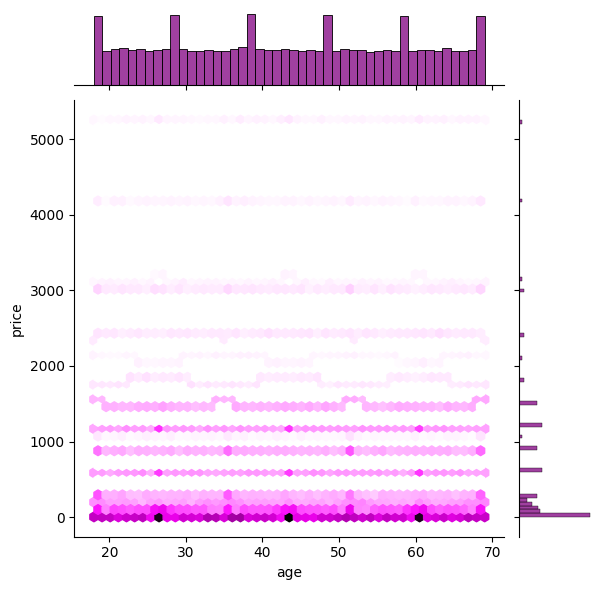

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a hexbin plot with marginal histograms
sns.jointplot(x='age', y='price', data=df, kind='hex', color='purple')
plt.show()


In [3]:
import plotly.express as px

# Create a parallel coordinates plot
fig = px.parallel_coordinates(df, color='age')
fig.show()

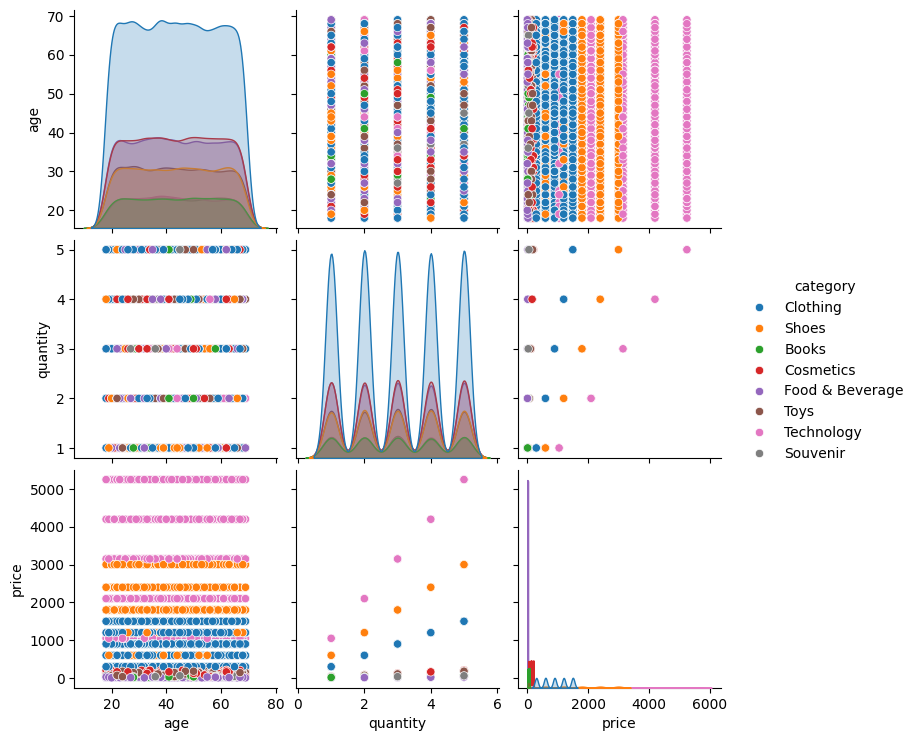

In [4]:
sns.pairplot(data=df, hue="category")
plt.show()

 Here I am taking sample size of 10 data points from the dataset and creates a bubble chart using the sampled data. since the customer id and invoice no is unique for every customer and using quantity as sample size.
  Bubble Chart with Invoice Number (x-axis), Customer ID (y-axis), and Quantity (bubble size)

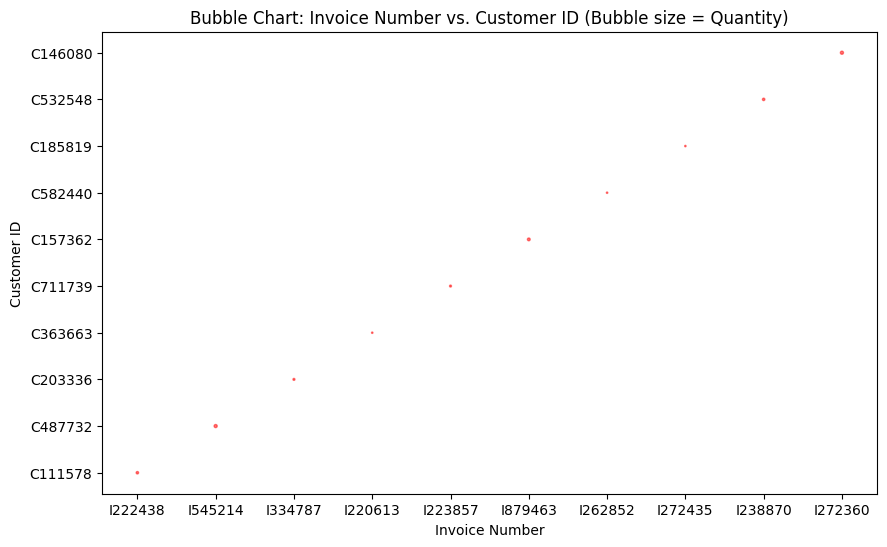

In [5]:
# Sample a subset of the data
sampled_data = df.sample(n=10)  # Adjust the number of samples as needed

plt.figure(figsize=(10, 6))
plt.scatter(sampled_data['invoice_no'], sampled_data['customer_id'], s=sampled_data['quantity'], alpha=0.5, c='red')
plt.title("Bubble Chart: Invoice Number vs. Customer ID (Bubble size = Quantity)")
plt.xlabel("Invoice Number")
plt.ylabel("Customer ID")
plt.show()


## Gender ##

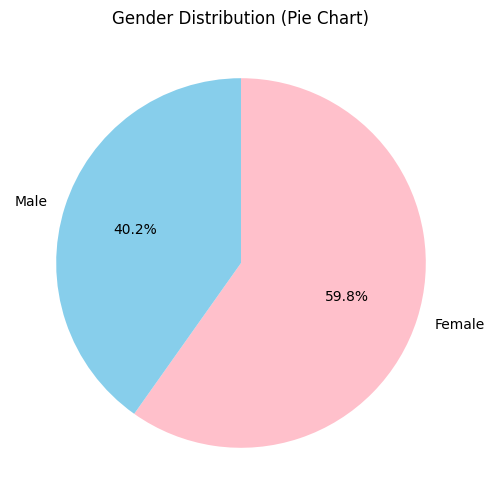

In [6]:
# Count the occurrences of each gender
gender_counts = df['gender'].value_counts()

# Labels for the pie chart
labels = gender_counts.index

# Data to be plotted
sizes = gender_counts.values

# Sort slices from largest to smallest
labels, sizes = zip(*sorted(zip(labels, sizes), key=lambda x: x[1], reverse=True))

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['pink', 'skyblue'], startangle=90, counterclock=False)

# Set the title
plt.title("Gender Distribution (Pie Chart)")
plt.show()


/var/folders/kw/dtj9__8n4qv9bxydv0cs61380000gn/T/ipykernel_20242/1675485577.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




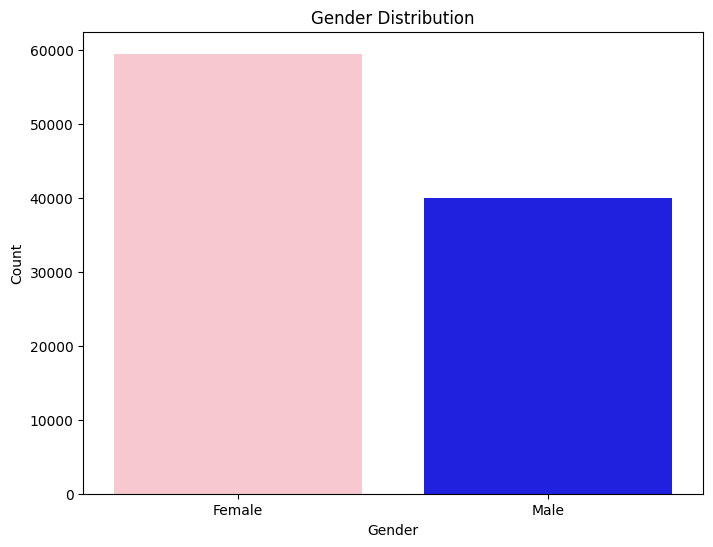

In [7]:
# Visualizing 'gender' using a bar chart

# Define a custom color palette
custom_palette = {"Male": "blue", "Female": "pink"}

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender', palette=custom_palette)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

## Age ##

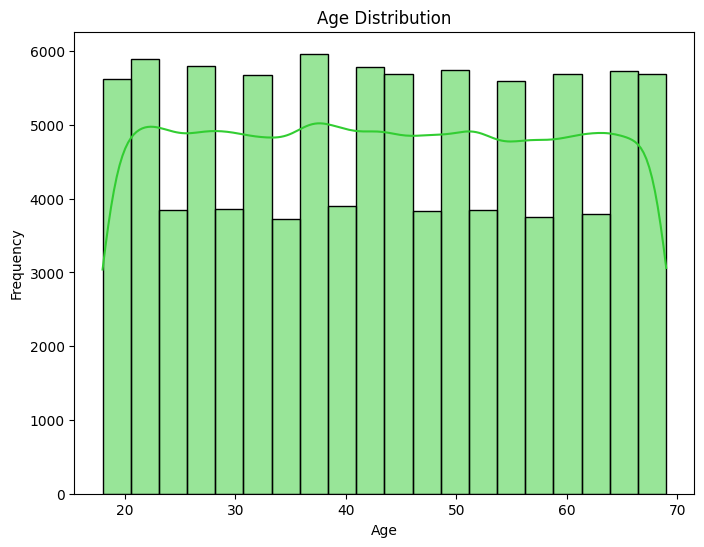

In [8]:
# Visualizing 'age' using a histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', bins=20, kde=True, color='Limegreen')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

 The box plot provides a summary of the distribution of the age data, including the median, quartiles, and potential outliers. 

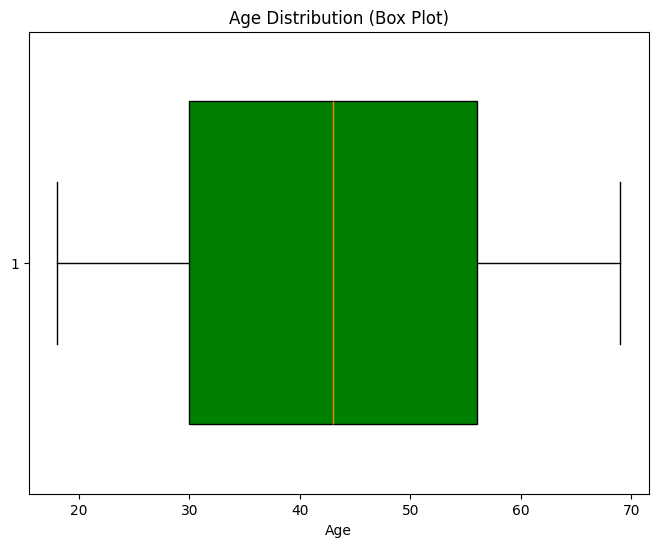

In [9]:
# Create a box plot for 'age'
plt.figure(figsize=(8, 6))
plt.boxplot(df['age'], vert=False, widths=0.7, patch_artist=True, boxprops=dict(facecolor='green'))
plt.title("Age Distribution (Box Plot)")
plt.xlabel("Age")
plt.show()


## Mean price by Quantity ###

In this code, we first calculate the mean price for each 'quantity' using groupby. Then, we create a line chart that shows the trend of the mean 'price' as 'quantity' changes. The 'marker' and 'linestyle' parameters control the appearance of the line plot, and 'grid(True)' adds grid lines for better visualization. 

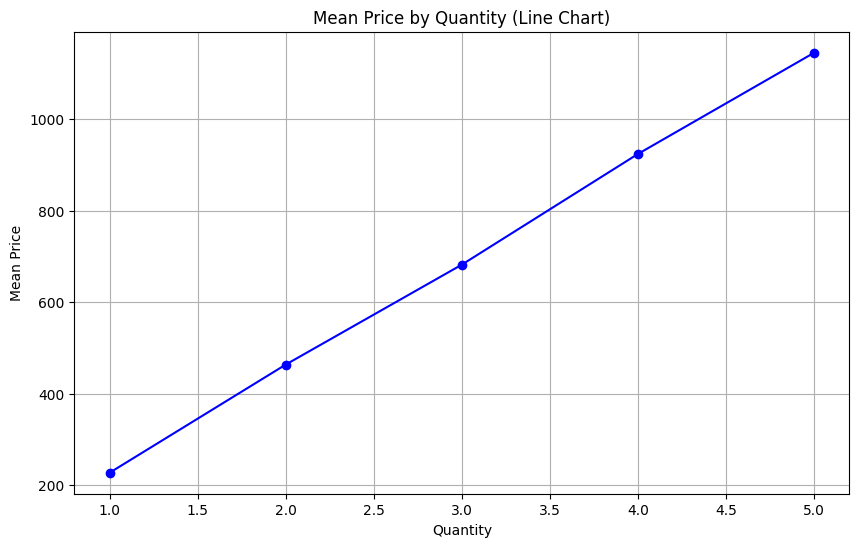

In [10]:
import matplotlib.pyplot as plt

# Group data by 'quantity' and calculate the mean price for each quantity
price_by_quantity = df.groupby('quantity')['price'].mean().reset_index()

# Create a line chart for 'quantity' vs. mean 'price'
plt.figure(figsize=(10, 6))
plt.plot(price_by_quantity['quantity'], price_by_quantity['price'], marker='o', color='blue', linestyle='-')
plt.title("Mean Price by Quantity (Line Chart)")
plt.xlabel("Quantity")
plt.ylabel("Mean Price")
plt.grid(True)
plt.show()


## Quantity VS. Price ##

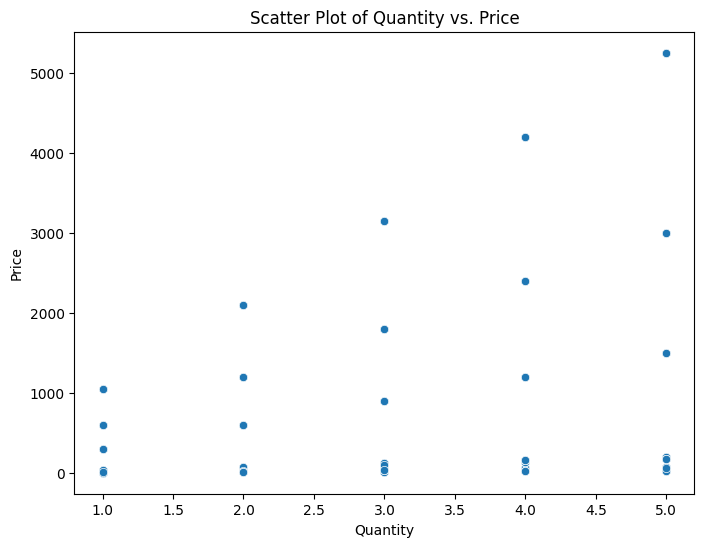

In [11]:
# Visualizing 'quantity' vs. 'price' using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='quantity', y='price')
plt.title("Scatter Plot of Quantity vs. Price")
plt.xlabel("Quantity")
plt.ylabel("Price")
plt.show()

## invoice_date ##

In this code, 'invoice_date' is first converted to datetime format, and then a new DataFrame is created for the bar chart. The bar chart displays the count of invoices per month.

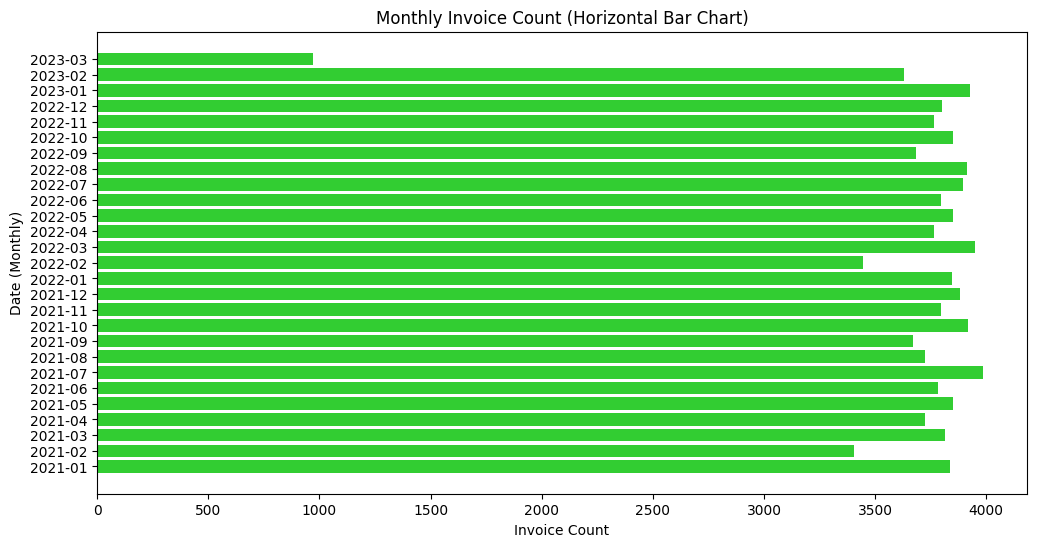

In [12]:
# Ensure 'invoice_date' is in datetime format
df['invoice_date'] = pd.to_datetime(df['invoice_date'])

# Create a new DataFrame for the horizontal bar chart
invoice_count_by_date = df['invoice_date'].dt.strftime('%Y-%m').value_counts().sort_index().reset_index()
invoice_count_by_date.columns = ['invoice_date', 'count']

# Create a horizontal bar chart for 'invoice_date' vs. invoice count
plt.figure(figsize=(12, 6))
plt.barh(invoice_count_by_date['invoice_date'], invoice_count_by_date['count'], color='Limegreen')
plt.title("Monthly Invoice Count (Horizontal Bar Chart)")
plt.ylabel("Date (Monthly)")
plt.xlabel("Invoice Count")
plt.show()


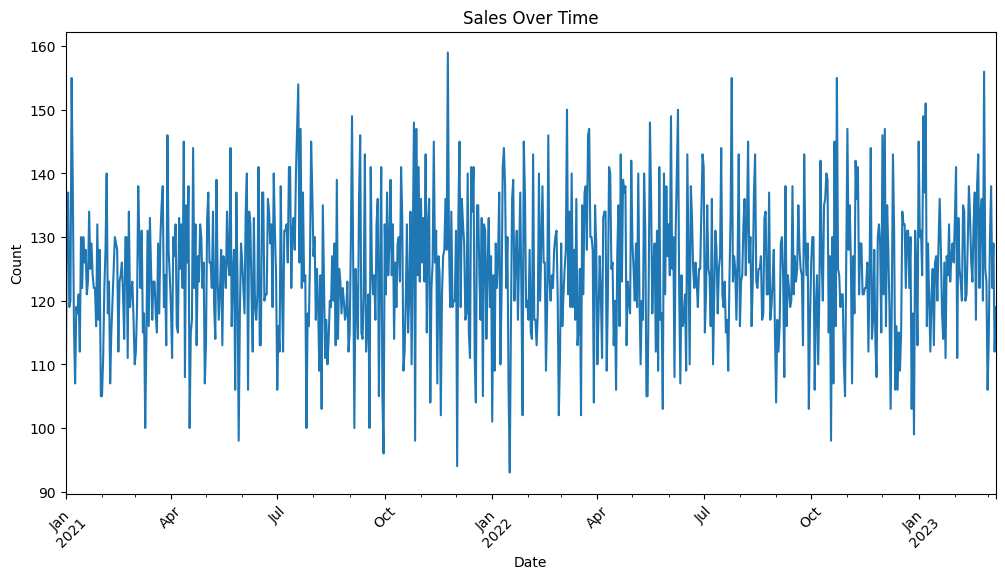

In [13]:
# Visualizing 'invoice_date' using a line chart (time series)
plt.figure(figsize=(12, 6))
df['invoice_date'].value_counts().sort_index().plot()
plt.title("Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

### category ###

In this code, 'category_counts' is calculated to count the occurrences of each category, and a bar chart is created to visualize the distribution of categories within the dataset

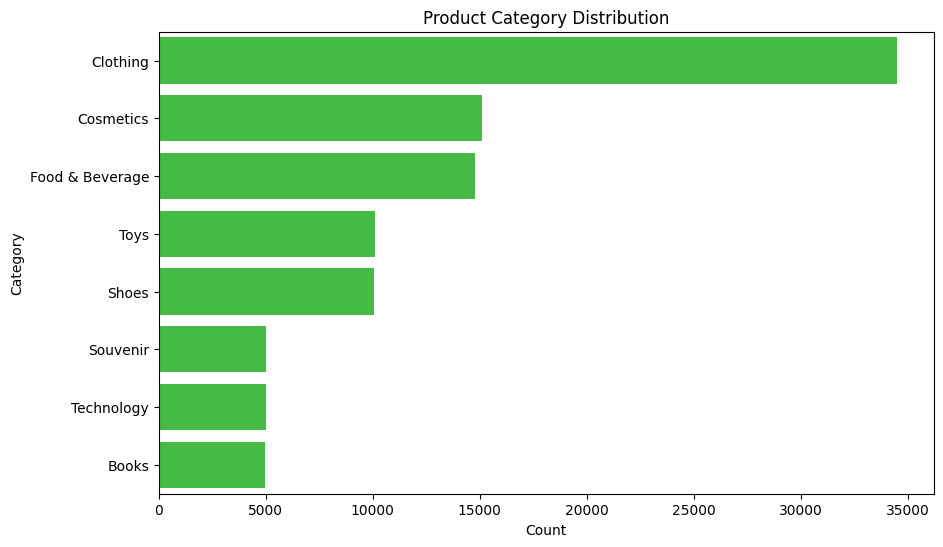

In [14]:
# Visualizing 'category' using a horizontal bar chart
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='category', order=df['category'].value_counts().index, color='Limegreen')
plt.title("Product Category Distribution")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()


## payment_method ##

In this code, 'payment_method_counts' is calculated to count the occurrences of each payment method, and a pie chart is created to visualize the distribution of payment methods within the dataset.

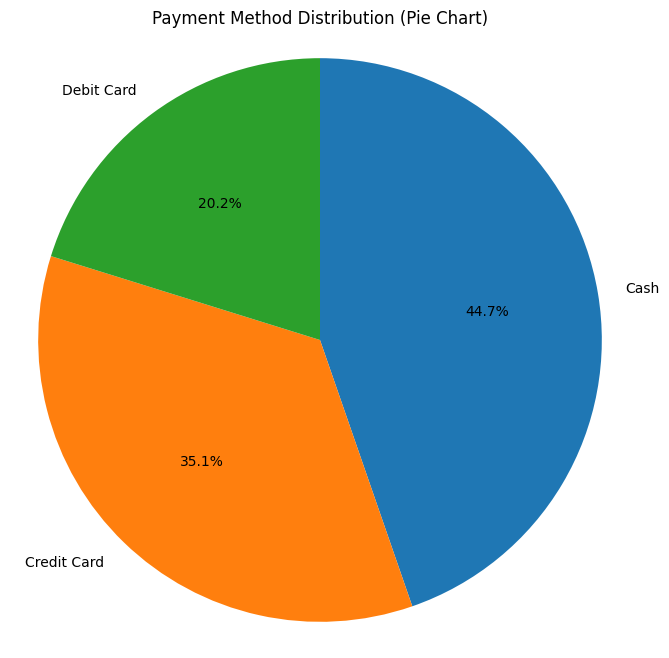

In [15]:
# Count the number of each payment method
payment_method_counts = df['payment_method'].value_counts()

# Sort the payment methods and counts from largest to smallest
sorted_payment_method_counts = payment_method_counts.sort_values(ascending=False)

# Create a pie chart for 'payment_method' distribution
plt.figure(figsize=(8, 8))

# Start with 90 degrees (12 o'clock), and arrange slices clockwise
plt.pie(sorted_payment_method_counts, labels=sorted_payment_method_counts.index, autopct='%1.1f%%', startangle=90, counterclock=False)

plt.title("Payment Method Distribution (Pie Chart)")
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.
plt.show()


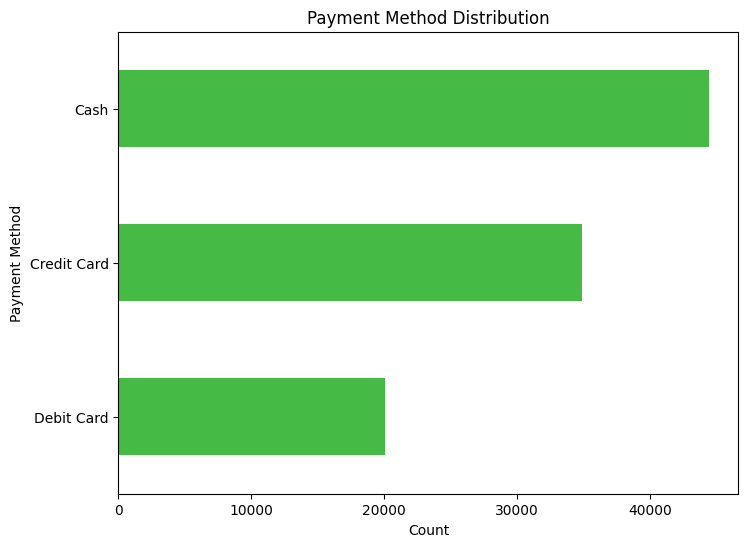

In [16]:
# Define the desired order for 'payment_method'
payment_method_order = df['payment_method'].value_counts().index

# Create a horizontal bar chart for 'payment_method' distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, y='payment_method', order=payment_method_order, width=0.5, color='limegreen')
plt.title("Payment Method Distribution")
plt.xlabel("Count")
plt.ylabel("Payment Method")
plt.show()


shopping_mall

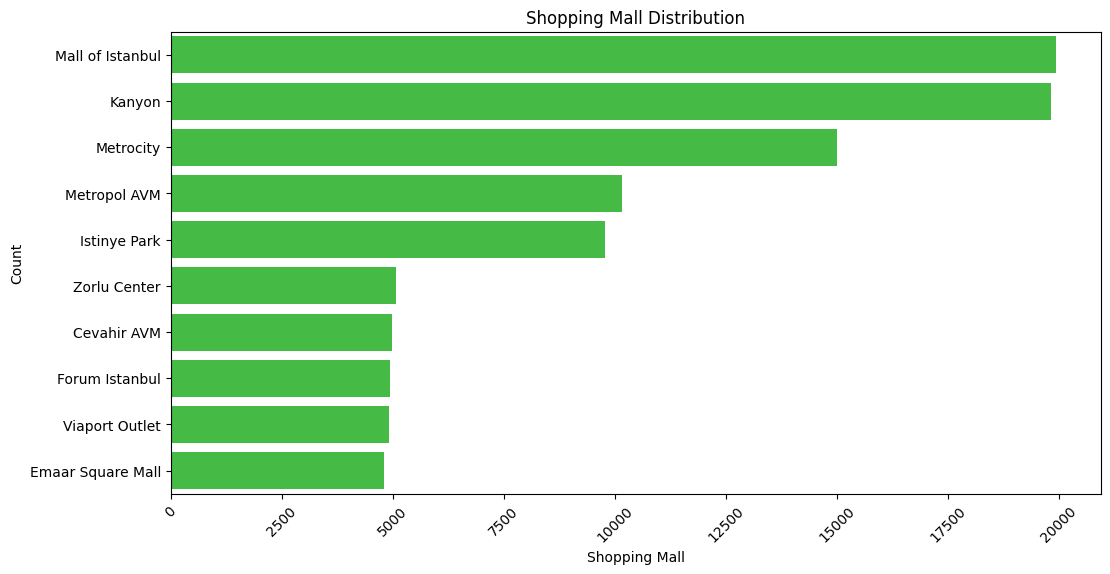

In [17]:
# Visualizing 'shopping_mall' using a horizontal bar chart
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='shopping_mall', order=df['shopping_mall'].value_counts().index , color = 'Limegreen')
plt.title("Shopping Mall Distribution")
plt.xlabel("Shopping Mall")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In this code, we use the squarify library to create a treemap. The size of each rectangle in the treemap represents the number of transactions for each shopping mall. 

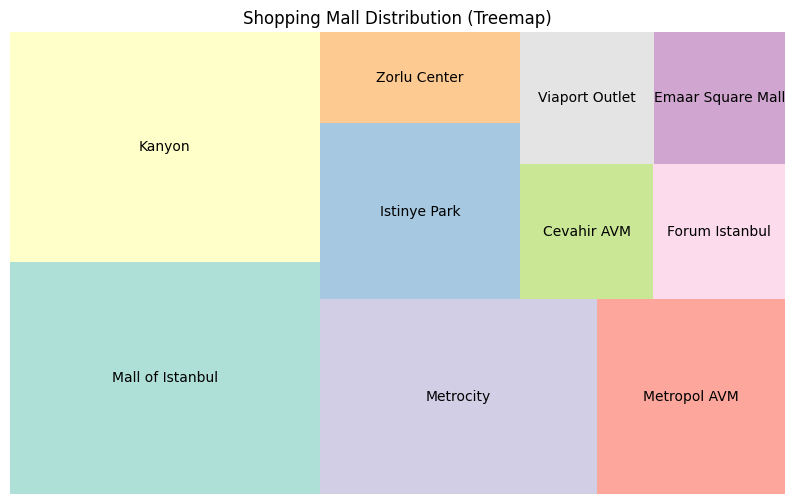

In [18]:
import squarify

# Count the number of transactions for each shopping mall
mall_counts = df['shopping_mall'].value_counts()

# Sort the shopping malls by count in descending order
sorted_malls = mall_counts.sort_values(ascending=False)

# Create a treemap
plt.figure(figsize=(10, 6))
squarify.plot(sizes=sorted_malls, label=sorted_malls.index, alpha=0.7, color=sns.color_palette('Set3'))
plt.title("Shopping Mall Distribution (Treemap)")
plt.axis('off')
plt.show()


## customer_id ##

To visualize customer_id I took a sample size 10 random customers, because each customer had a unique customer id and most of the data follows same pattern.

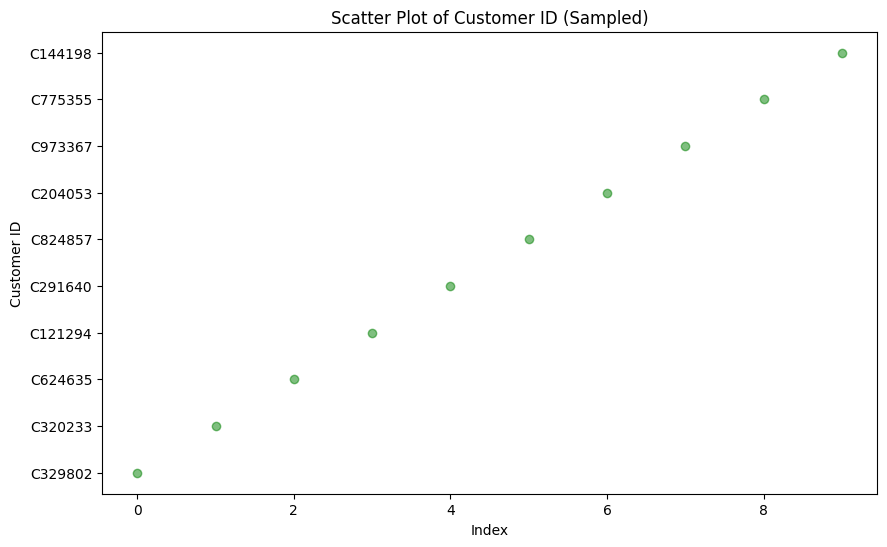

In [19]:
import matplotlib.pyplot as plt
import random  # Import the random module

# Sample size (you can adjust this to a smaller number)
sample_size = 10

# Randomly select a subset of data for visualization
sampled_data = df.sample(n=sample_size)

plt.figure(figsize=(10, 6))
plt.scatter(range(len(sampled_data['customer_id'])), sampled_data['customer_id'], alpha=0.5, color='green')
plt.title("Scatter Plot of Customer ID (Sampled)")
plt.xlabel("Index")
plt.ylabel("Customer ID")
plt.show()


## invoice_no ##

To visualize invoice_no  I took a sample size 10 random invoice_no, because each customer had a unique invoice_no and most of the data follows same pattern.

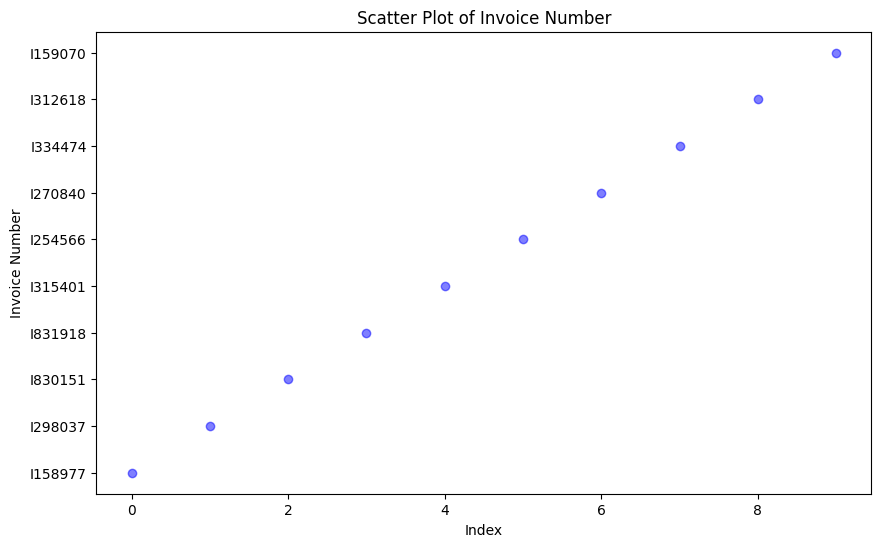

In [20]:
# Sample size (you can adjust this to a smaller number)
sample_size = 10

# Randomly select a subset of data for visualization
sampled_data = df.sample(n=sample_size)

plt.figure(figsize=(10, 6))
plt.scatter(range(len(sampled_data['invoice_no'])), sampled_data['invoice_no'], alpha=0.5, color='blue')  # Adjust 'alpha' and 'color' as needed
plt.title("Scatter Plot of Invoice Number")
plt.xlabel("Index")
plt.ylabel("Invoice Number")
plt.show()


## Evaluation of the effectiveness of the visualizations using chart design principles ##
After evaluation of visualizations I identified few areas for improvement based on principles of chart design (e.g., clarity, simplicity, consistency) such as when column chart has long x-axis labels, consider turning the chart 90 degrees so that it becomes a horizontal bar chart & arranging elements logically. 
Second one if the pie chart has more than five slices, consider showing the data in a bar chart, either stacked or split (Dougherty & Ilyankou, 2023).
So I modified the code according to the principles for better visualization.



## Data Visualization and Analysis Report ##

Understanding and Improving Data Visualizations

Executive Summary

In this report, we aim to enhance data visualizations and communication of data insights using a dataset that includes various variables such as gender, age, category, quantity, price, payment method, invoice date, and shopping mall. We have applied principles of chart design to create effective visualizations and made improvements where needed. The final report communicates these insights to a specific audience.

Introduction

Visualizations are essential for understanding data and deriving actionable insights. In this report, we analyze a dataset that represents various aspects of customer shopping behavior. We explore different variables using a variety of visualization techniques.

Data Exploration

Before diving into visualizations, we conducted an initial data exploration, which included checking for missing values and identifying potential outliers. This step ensures the integrity of our data and helps us make informed decisions during visualization.

Data Visualization and Analysis

Customer Shopping Behavior Visualization:
Gender Distribution: We started by visualizing the distribution of gender using both a pie chart and a horizontal bar chart. The updated visualizations are more intuitive and easier to understand, presenting gender proportions clearly.
Age Distribution: For visualizing the age distribution, we used a histogram and a box plot. The histogram was improved by introducing a custom color palette, making it visually appealing and easier to interpret.
Category Relationships: We employed a pairplot to explore relationships between product categories. The updated visualizations offer more insights into category correlations.
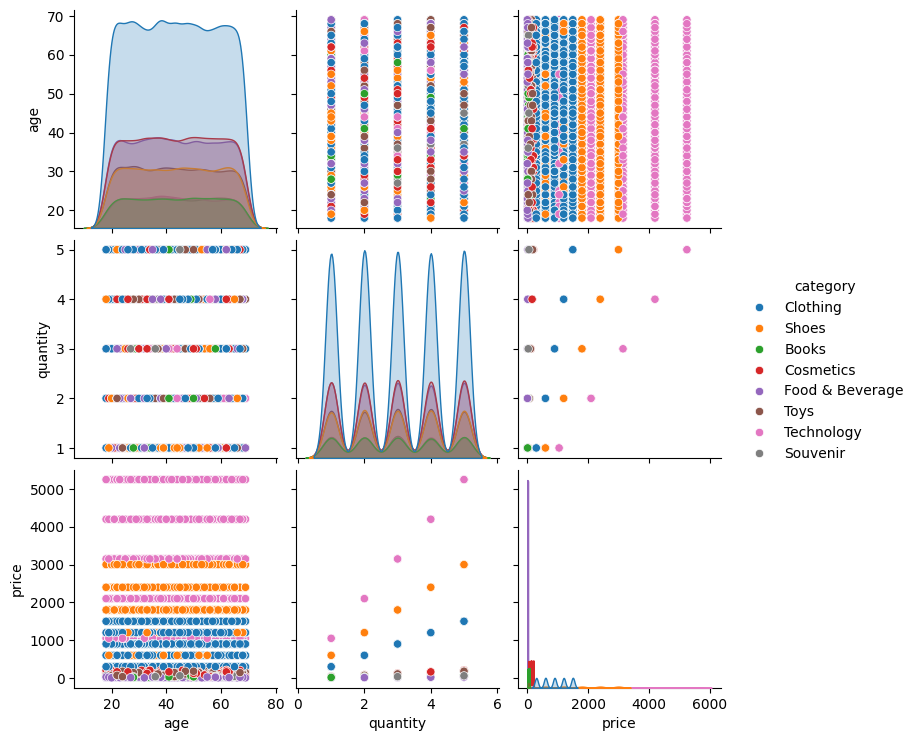

Payment Methods: The payment methods distribution was depicted through a pie chart and a horizontal bar chart. We improved the pie chart's layout by organizing slices clockwise and highlighting the most used payment methods.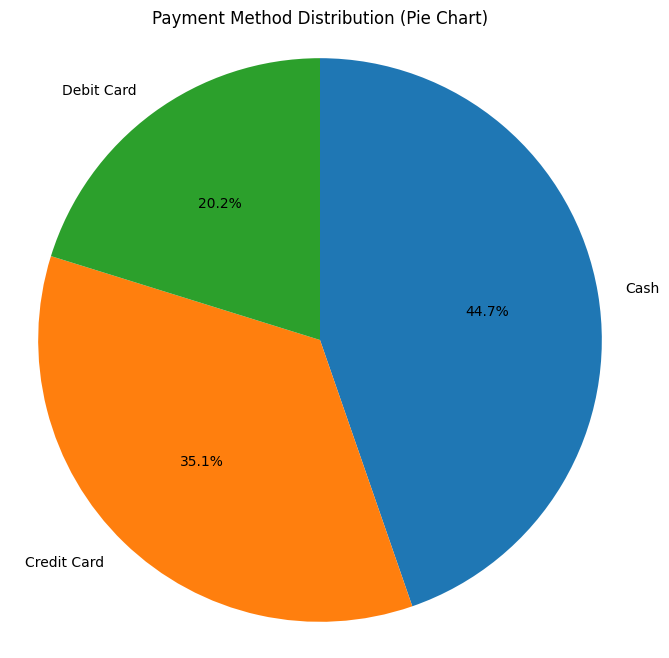

Shopping Mall Visualization:
Shopping Mall Distribution: Initially, our approach to visualizing the distribution of shopping malls involved the creation of a traditional bar chart. However, we encountered a challenge when dealing with long x-axis labels. The labels were extensive and cluttered, making it difficult to grasp the data at a glance. To address this issue and improve visualization clarity, we decided to rotate the bar chart, turning it into a horizontal bar chart. This strategic adjustment helped with the presentation of long labels and made the visualization more accessible to our audience.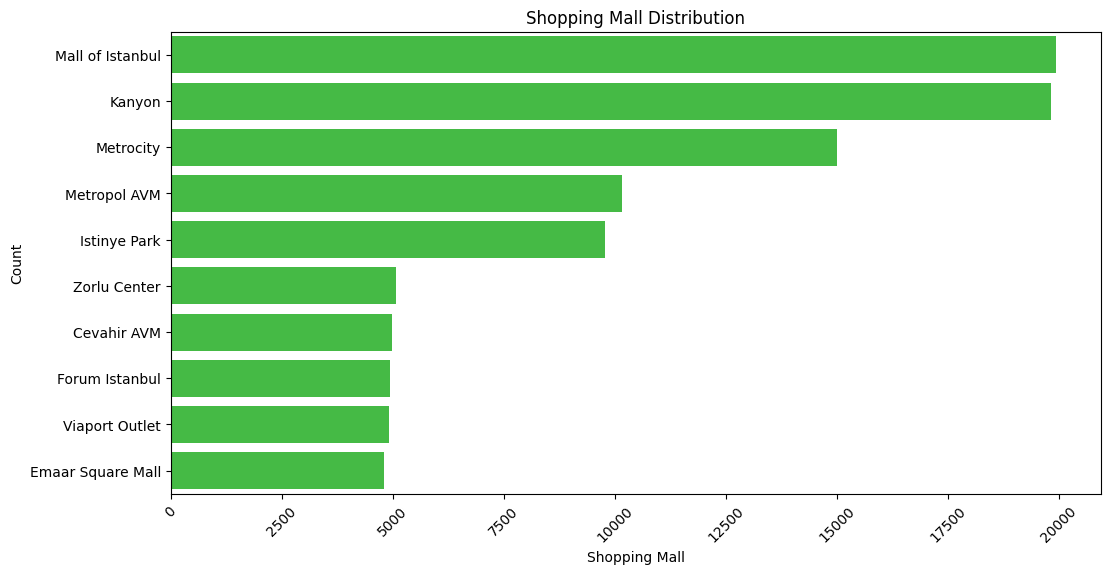
Moreover, We introduced a treemap to enhance our shopping mall distribution visualization. The treemap assigns areas to different malls based on their count, creating a mosaic of rectangles proportional to the number of transactions associated with each mall.
Customer ID and Invoice Number: We also visualized customer IDs and invoice numbers using scatter plots. The visualizations were enhanced for better clarity and impact.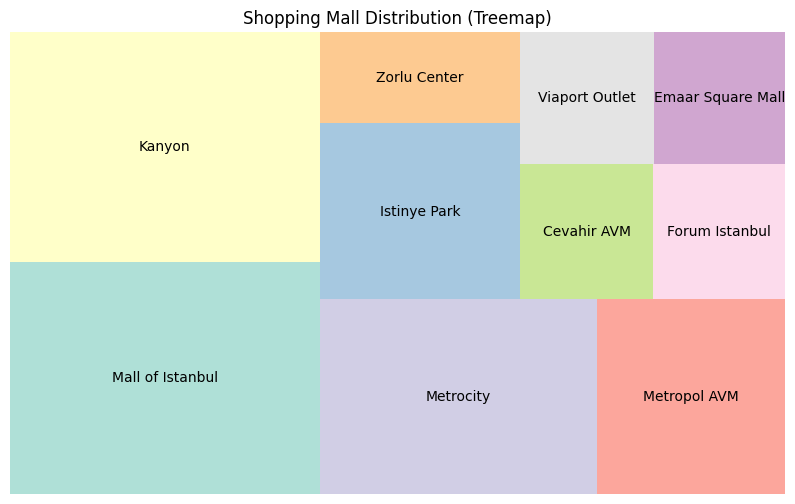
Quantity vs. Price: The relationship between quantity and price was depicted using a line chart. While the initial chart was informative, the updated version conveys the message more clearly.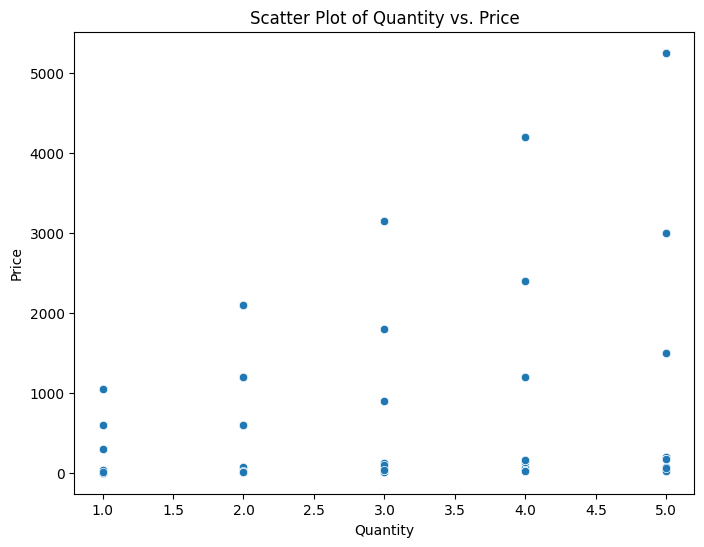

Areas Improved

Visualization Type Selection: By choosing the most appropriate visualization type for each variable, we ensured that data insights were conveyed more effectively. For example, pie charts were replaced with horizontal bar charts for improved clarity. 
Aesthetic Enhancements: Improving the aesthetics of visualizations, such as adding custom color palettes and organizing slices logically, and rotating bar graphs significantly enhanced their visual appeal.


Conclusion

Effective data visualization is essential for understanding complex datasets and deriving meaningful insights. By applying principles of chart design and making appropriate improvements, we've transformed our visualizations into valuable tools for data analysis. These visualizations offer our specific audience the ability to grasp insights more easily and make informed decisions.




References:

Kaggle. (2023). Customer Shopping Dataset - Retail Sales Data [Data set]. https://www.kaggle.com/datasets/mehmettahiraslan/customer-shopping-dataset

Dougherty, J., & Ilyankou, I. (2023). Hands-On Data Visualization. O'REILLY'. https://handsondataviz.org/chart-design.html
